In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#machine learning
#for sklearn

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#read data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
feature_desc = pd.read_csv("feature_descriptions.csv")

train_labels = pd.read_csv("train_labels.csv")

In [4]:
#concate train_labels to train
train = pd.merge(train,
                 train_labels,
                 on = 'id')

In [5]:
#label data as test/train
train['dataType'] = 'train'
test['dataType'] = 'test'

In [6]:
trainTest = pd.concat([train,test])

In [7]:
train.shape

(59400, 42)

In [8]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [9]:
train.isnull().sum()

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [10]:
threshold5per = len(train)*.05

In [11]:
columns2Drop = train.columns[train.isnull().sum()>threshold5per]

In [12]:
#drop from train, test, and master
train.drop(labels = columns2Drop, inplace=True, axis =1)
test.drop(labels = columns2Drop, inplace=True, axis =1)
trainTest.drop(labels = columns2Drop, inplace=True, axis =1)

In [13]:
#drop id from train, test, and master
train.drop(labels = 'id', inplace=True, axis =1)
test.drop(labels = 'id', inplace=True, axis =1)
trainTest.drop(labels = 'id', inplace=True, axis =1)

In [14]:
train.isnull().sum()
#subvillage is now the only thing missing data

amount_tsh               0  
date_recorded            0  
gps_height               0  
longitude                0  
latitude                 0  
wpt_name                 0  
num_private              0  
basin                    0  
subvillage               371
region                   0  
region_code              0  
district_code            0  
lga                      0  
ward                     0  
population               0  
recorded_by              0  
construction_year        0  
extraction_type          0  
extraction_type_group    0  
extraction_type_class    0  
management               0  
management_group         0  
payment                  0  
payment_type             0  
water_quality            0  
quality_group            0  
quantity                 0  
quantity_group           0  
source                   0  
source_type              0  
source_class             0  
waterpoint_type          0  
waterpoint_type_group    0  
status_group             0  
dataType      

In [15]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [16]:
print(cat_col)

['date_recorded', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'dataType']


In [17]:
print(train[cat_col].nunique())
print()
print(train[cat_col].nunique()>21)

#convert date_recorded into an actual date
#drop anything with more than 21 different categories
#drop recorded_by as only has 1 unique value

date_recorded            356  
wpt_name                 37400
basin                    9    
subvillage               19287
region                   21   
lga                      125  
ward                     2092 
recorded_by              1    
extraction_type          18   
extraction_type_group    13   
extraction_type_class    7    
management               12   
management_group         5    
payment                  7    
payment_type             7    
water_quality            8    
quality_group            6    
quantity                 5    
quantity_group           5    
source                   10   
source_type              7    
source_class             3    
waterpoint_type          7    
waterpoint_type_group    6    
status_group             3    
dataType                 1    
dtype: int64

date_recorded            True 
wpt_name                 True 
basin                    False
subvillage               True 
region                   False
lga                      

In [18]:
columns2drop2 = ['wpt_name','subvillage','lga','ward','recorded_by']

In [19]:
#dropping additional features
train.drop(columns2drop2, inplace=True, axis =1)
test.drop(columns2drop2, inplace=True, axis =1)
trainTest.drop(columns2drop2, inplace=True, axis =1)

In [20]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [21]:
#convert string date to date time
train['date_recorded'] = pd.to_datetime(train['date_recorded'])
test['date_recorded'] = pd.to_datetime(test['date_recorded'])
trainTest['date_recorded'] = pd.to_datetime(trainTest['date_recorded'])

In [22]:
#create columns to split out the data
train['year'] = pd.DatetimeIndex(train['date_recorded']).year
train['month'] = pd.DatetimeIndex(train['date_recorded']).month
train['day'] = pd.DatetimeIndex(train['date_recorded']).day

test['year'] = pd.DatetimeIndex(test['date_recorded']).year
test['month'] = pd.DatetimeIndex(test['date_recorded']).month
test['day'] = pd.DatetimeIndex(test['date_recorded']).day

trainTest['year'] = pd.DatetimeIndex(trainTest['date_recorded']).year
trainTest['month'] = pd.DatetimeIndex(trainTest['date_recorded']).month
trainTest['day'] = pd.DatetimeIndex(trainTest['date_recorded']).day


In [23]:
print('Unique Years: {}'.format(train.year.nunique()))
print('Unique Months: {}'.format(train.month.nunique()))
print('Unique Days: {}'.format(train.day.nunique()))

Unique Years: 5
Unique Months: 12
Unique Days: 31


2011    28674
2013    24271
2012    6424 
2004    30   
2002    1    
Name: year, dtype: int64


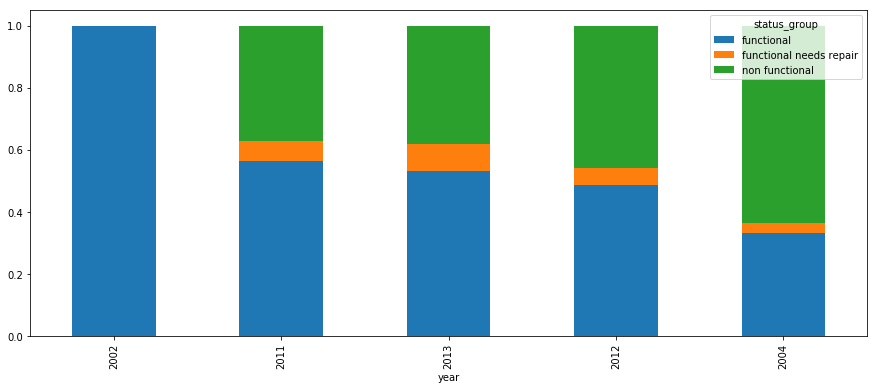

In [24]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('year').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

#how many counts did we have for 2002 and 2004?
print(train.year.value_counts())

#any data before 2011 may not be helpful.  Possible that the data is way less accurate

In [25]:
#what years does the test set have?
test.year.value_counts()

#as predicted in the train set, there aren't a ton of values pre 2011.

#pre 2011 might be a good cut off to feature engineer

2011    7234
2013    5939
2012    1665
2004    11  
2001    1   
Name: year, dtype: int64

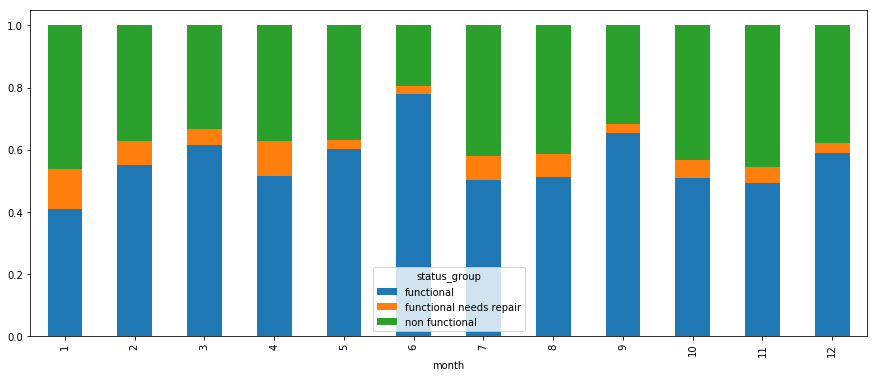

In [26]:
train.groupby('month').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#Observations

#June is by far the highest - feature engineering
#last month of the quarter is the best - feature engineering 

#hypothesis that non profits or NGOs have money they need to use at by the end of the quarter, so use it or lose it
#and spend on making wells

In [27]:
def quartermonth(x):
    if x % 3 == 0:
        return(3)
    if x % 3 == 2:
        return(2)
    if x % 3 == 1:
        return(1)        

In [28]:
train['quarterMonth'] = train['month'].apply(quartermonth)
test['quarterMonth'] = test['month'].apply(quartermonth)
trainTest['quarterMonth'] = trainTest['month'].apply(quartermonth)

In [29]:
num_col = list(train.select_dtypes(exclude = ['object']).columns)
print(num_col)

['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'year', 'month', 'day', 'quarterMonth']


In [30]:
# ['amount_tsh','gps_height','longitude','latitude', 'num_private', 'region_code', 'district_code']
# ['population','construction_year', 'year', 'month', 'day', 'quarterMonth']

IndentationError: unexpected indent (<ipython-input-30-6c93ae0b7212>, line 2)

In [31]:
train.num_private.describe()

count    59400.000000
mean     0.474141    
std      12.236230   
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      1776.000000 
Name: num_private, dtype: float64

C:\Users\jbonanno\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


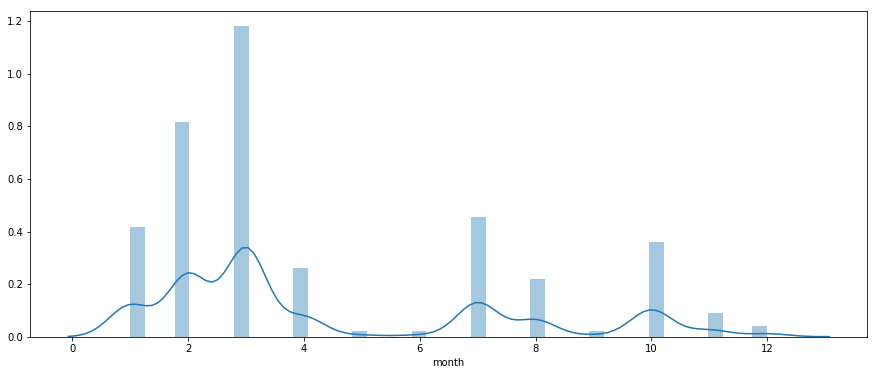

In [32]:
sns.distplot(train['month'])

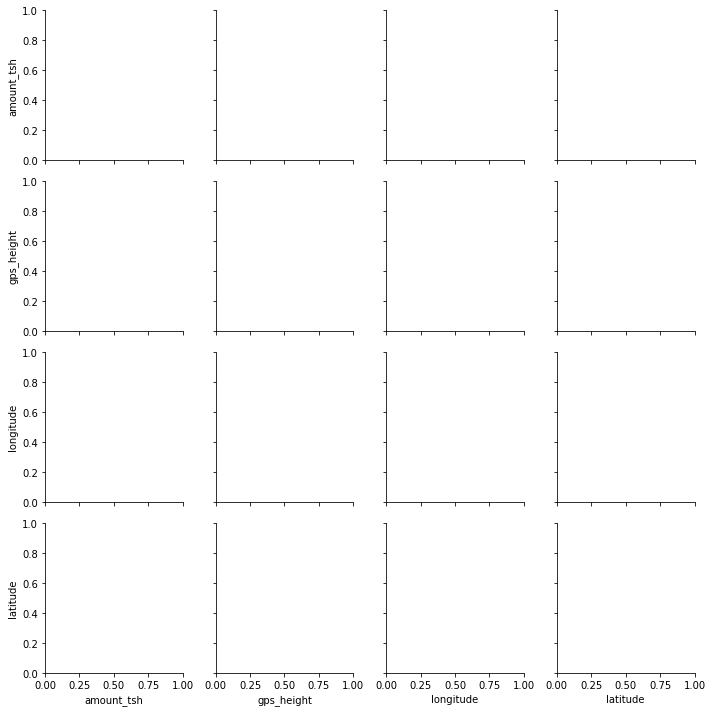

In [33]:
%matplotlib inline

sns.PairGrid(train[['amount_tsh','gps_height','longitude','latitude',
                    'status_group']], 
             hue = 'status_group')

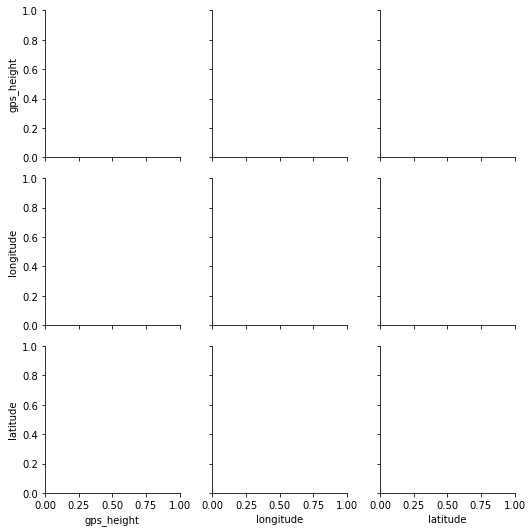

In [34]:
sns.PairGrid(train[['gps_height','longitude','latitude',
                    'status_group']])

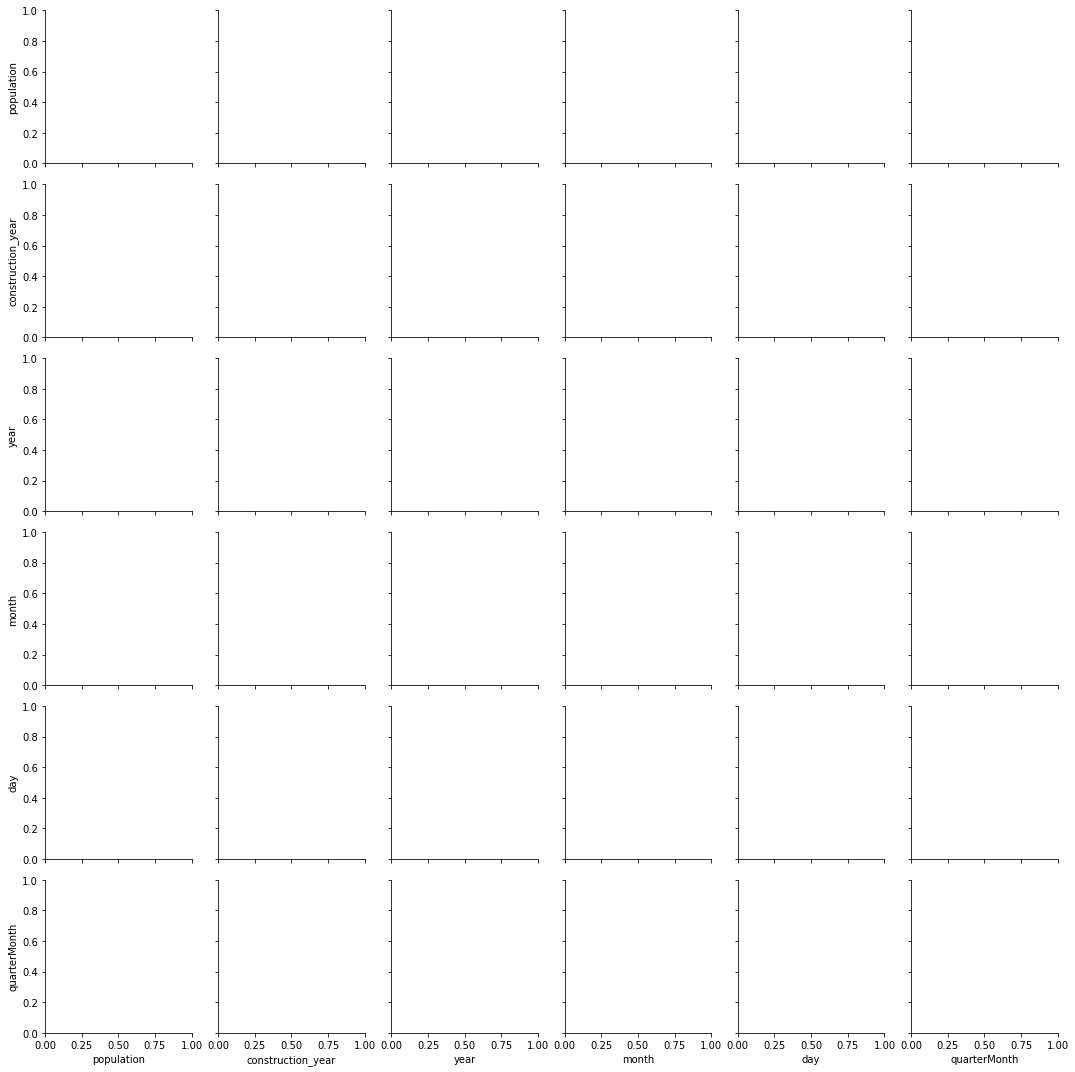

In [35]:
sns.PairGrid(train[['population','construction_year', 'year', 'month', 'day', 'quarterMonth',
                    'status_group']], 
             hue = 'status_group')
plt.show()

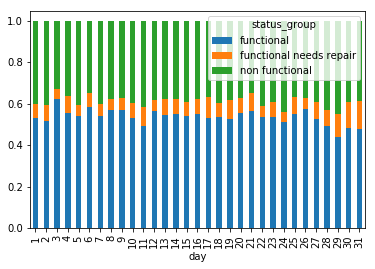

In [36]:
train.groupby('day').status_group.value_counts(
    normalize = True).unstack().plot(
    kind='bar',stacked = True)

#observations

In [51]:
train[cat_col].columns

Index(['date_recorded', 'basin', 'region', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'dataType'],
      dtype='object')

In [50]:
train.status_group.value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Need to look at a differnet feature groups to see if they are the same or if they have any differences

extraction_type, extraction_type_group, extraction_type_group
management, management_group
payment, payment_type
water_quality, quality_group
quantity, quantity_group
source, source_type, source_group
waterpoint_type, waterpoint_group

In [ ]:
train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values('functional',ascending=False)

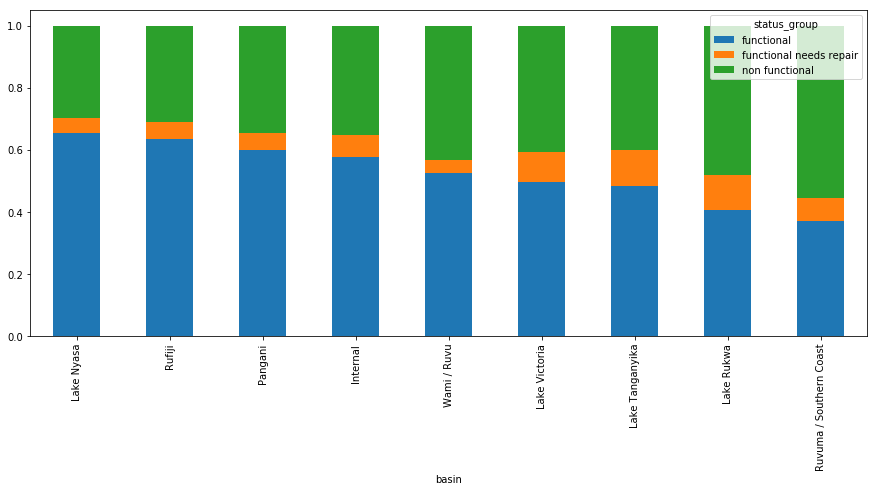

In [37]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

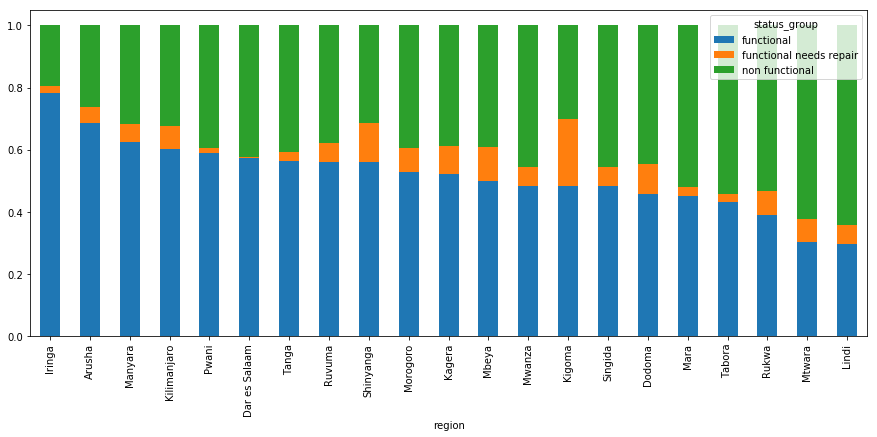

In [53]:
#region
train.groupby('region').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [113]:
train[['extraction_type','extraction_type_group','extraction_type_class']].nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class    7 
dtype: int64

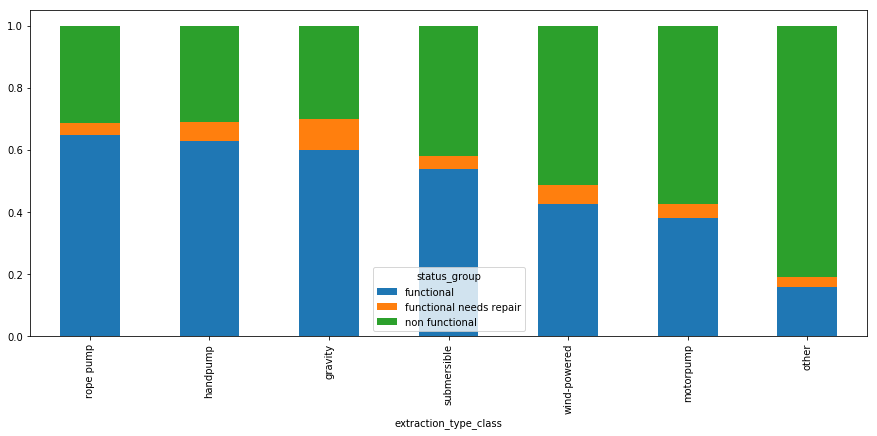

In [114]:
train.groupby('extraction_type_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [115]:
train[['management','management_group']].nunique()

management          12
management_group    5 
dtype: int64

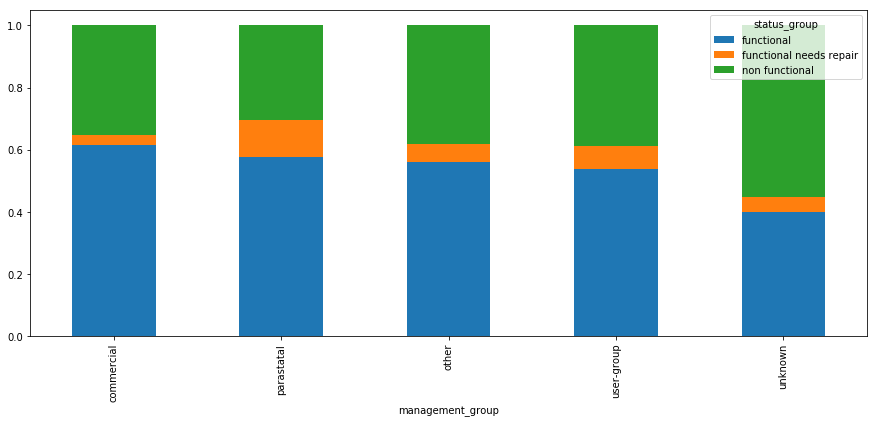

In [59]:
#managment_group
train.groupby('management_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [116]:
train[['payment','payment_type']].nunique()

payment         7
payment_type    7
dtype: int64

In [120]:
print(train.payment.value_counts())
print()
print(train.payment_type.value_counts())

never pay                25348
pay per bucket           8985 
pay monthly              8300 
unknown                  8157 
pay when scheme fails    3914 
pay annually             3642 
other                    1054 
Name: payment, dtype: int64

never pay     25348
per bucket    8985 
monthly       8300 
unknown       8157 
on failure    3914 
annually      3642 
other         1054 
Name: payment_type, dtype: int64


In [122]:
#strongly suspect that payment and payment_type are exactly the same
#and can drop one

poc = train[['payment','payment_type']].copy()

#never pay - confirmed
#pay per buckect - confirmed
#pay monthly - confirmed
#unknown - confirmed
#pay when scheme fails - confirmed
#pay annually - confirmed
#other - confirmed

poc[poc['payment']=='other']


In [131]:
#drop payment feature as exacply the same as payment_type
train.drop(labels = 'payment', inplace=True, axis =1)
test.drop(labels = 'payment', inplace=True, axis =1)
trainTest.drop(labels = 'payment', inplace=True, axis =1)

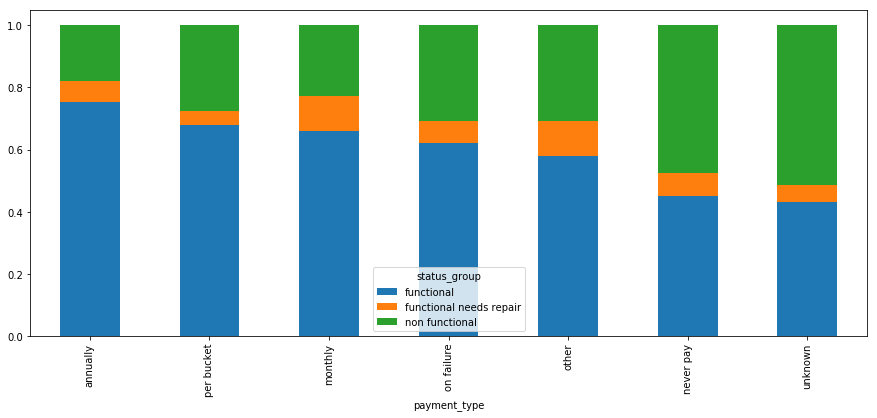

In [61]:
#payment_type
train.groupby('payment_type').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [132]:
train[['water_quality','quantity_group']].nunique()

water_quality     8
quantity_group    5
dtype: int64

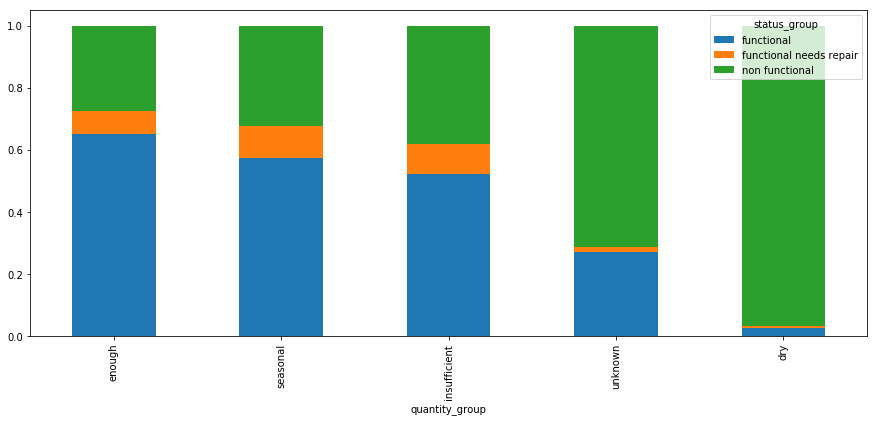

In [134]:
#quanity_group
train.groupby('quantity_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [135]:
train[['source','source_type','source_class']].nunique()

source          10
source_type     7 
source_class    3 
dtype: int64

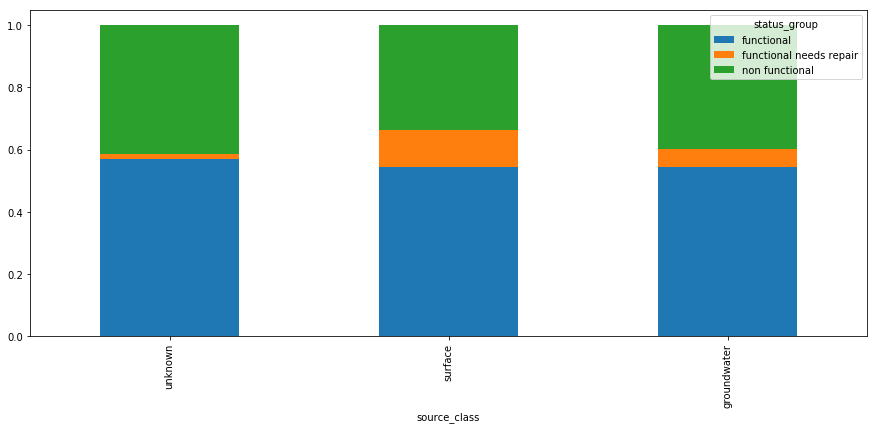

In [136]:
#source_class
train.groupby('source_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [137]:
train[['waterpoint_type','waterpoint_type_group']].nunique()

waterpoint_type          7
waterpoint_type_group    6
dtype: int64

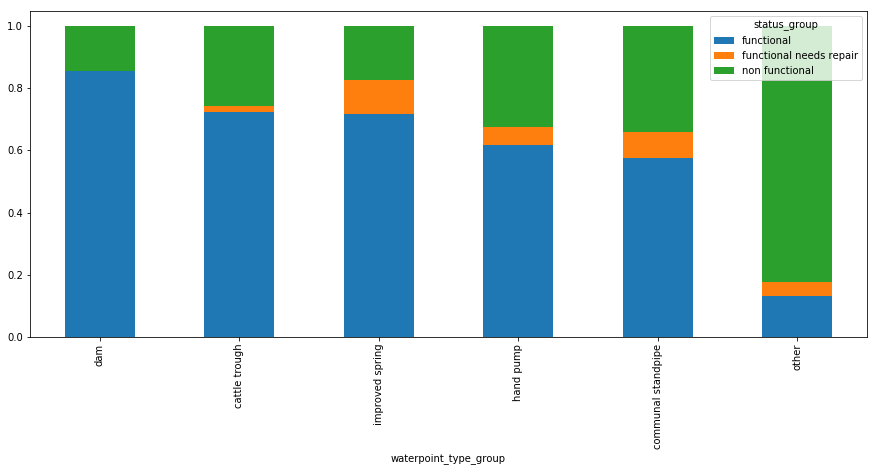

In [139]:
#water_type_group
train.groupby('waterpoint_type_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [27]:
#goal for today is to split the data into year, month, and day.  Then run EDA on it if I have time.   
train.waterpoint_type.dtypes

dtype('O')

In [28]:
train['date_recorded'] = pd.to_datetime(train['date_recorded'])

In [29]:
train.date_recorded.dtypes

dtype('<M8[ns]')